# $\color{Violet}{\text{Week 7: Plotting Simulated High-Energy Physics Observables}}$
Below is a series of code blocks importing a simulated 4D histogram named `hist4D`. This histogram contains four axes and can be unpacked using `BoostHistogram` (https://boost-histogram.readthedocs.io/en/latest/). In this homework, you will be asked to create plots of various slices into this histogram. While simulating this data, many hadrons were manually set to not decay so their spectra can be viewed.

In [ ]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pickle
import gzip
import pathlib
import math

!pip install boost_histogram
import boost_histogram as bh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00


In [ ]:
histfile = pathlib.Path("hist.simulated_particles1.pkl.gz") #Pickle is a package that allows you to "serialize", save, and extract Python objects.

with gzip.open(histfile, "rb") as f: #Must gzip to uncompress the compressed file
    saved_dict = pickle.load(f)

hist4D = saved_dict["hist4D"] #Renaming the histogram
check = saved_dict["charged_part_density"]
n_events = saved_dict["n_events"]

In [ ]:
hist4D #Printing the description of each axis by just running a cell with the  histogram name in it.

Histogram(
  Variable([2, 42, 62, 82, 104, 142, 160.28, 186, 220, 272.076, 322], underflow=False, overflow=False, metadata='N Charged'),
  Regular(50, 10, 10000, transform=log, metadata='$p_\\mathrm{T}$ / $\\mathrm{MeV}\\,c^{-1}$'),
  Regular(29, -14.5, 14.5, metadata='Eta'),
  IntCategory([1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 2212, -2212, 211, -211, 310, 130, 321, -321, 3122, -3122, 3322, -3322, 3312, -3312, 3334, -3334, 3222, -3222, 3212, -3212, 3112, -3112, 333], metadata='PID'),
  storage=Double()) # Sum: 163781.0 (169654.0 with flow)

You can index into each axis of the histogram as so: `hist4D.axes[#]` where 0 represents the first (N Charged) axis. This axis quantifies the number of final-state charged particles that result from the collison. Axis 1 represents the transverse momenta of the final state particles in MeV. Axis 2 holds the pseudorapidity of the final state particles ("Eta"). Lastly, axis 3 holds the PDGID's of a selection of final-state particles and their quantites.

## Denisty Spectra

Density spectra are simply histograms of a particular observable that are normalized (divided by; standardized) to the total number of events/observations/counts/etc and/or the bin width.

In [ ]:
print(hist4D.axes[1].widths) #Notice that the bins in this histogram axis are not in even intervals.

[   1.48153621    1.70103117    1.9530451     2.2423958     2.57461486
    2.95605338    3.39400339    3.89683729    4.47416784    5.13703201
    5.89810191    6.77192706    7.77521258    8.92713848   10.24972638
   11.76826046   13.51177087   15.51358866   17.811983     20.45089279
   23.48076661   26.95952722   30.95367882   35.53957843   40.80489568
   46.85028875   53.7913287    61.76070885   70.91078153   81.41647062
   93.47861559  107.32781103  123.22881492  141.48561012  162.44721565
  186.51435895  214.14713669  245.87381053  282.30090599  324.12480756
  372.14507162  427.2797117   490.58274838  563.2643592   646.71401387
  742.5270371   852.5351067   978.84127022 1123.86014927 1290.36410044]


Text(0.5, 1.0, 'Momenta Density Spectrum for 1000 Events')

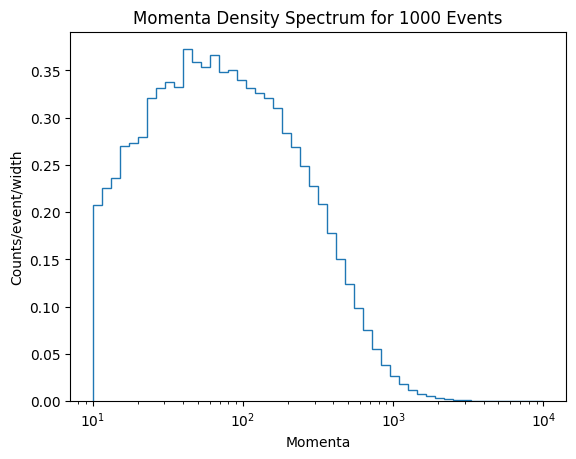

In [ ]:
#Densities - pt (Momenta)
plt.stairs(hist4D.project(1).values() / n_events / hist4D.axes[1].widths, hist4D.axes[1].edges) #stairs expects bins
plt.semilogx()
plt.xlabel("Momenta")
plt.ylabel("Counts/event/width")
plt.title("Momenta Density Spectrum for " + str(n_events) + " Events")

And there's a desnity plot of particle transverse momenta! Is it as you'd expect?

### $\color{orange}{\text{Activity 1: Pseudorapidity Densities}}$

Using the example above, create a similar denisty spectrum of particle pseudorapidities (eta). Label appropriately. In a markdown cell, describe what you see. Knowing what you do about how we geometrically define pseudorapidity with respect to collider beamlines (ex. CMS, ATLAS), how do you interpret this spectrum?

Text(0.5, 1.0, 'Pseudorapidity Density Spectrum for 1000 Events')

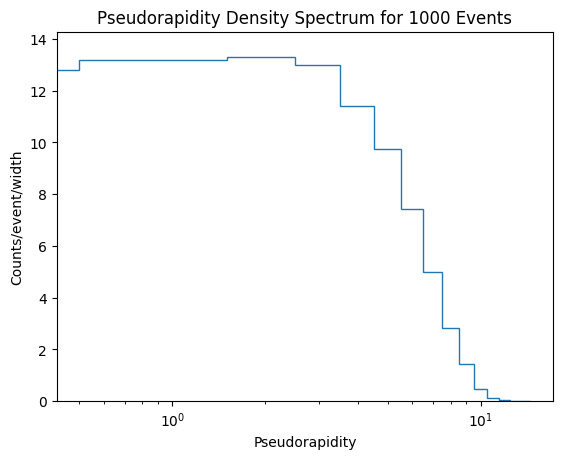

In [ ]:
#Densities - Eta (Angle)

plt.stairs(hist4D.project(2).values() / n_events / hist4D.axes[2].widths, hist4D.axes[2].edges)
plt.semilogx()
plt.xlabel("Pseudorapidity")
plt.ylabel("Counts/event/width")
plt.title("Pseudorapidity Density Spectrum for " + str(n_events) + " Events")



## Average Particle Frequencies

### $\color{orange}{\text{Activity 2: Average Particle Frequencies}}$

Let's execute an algorithum that averages the total frequencies of each final state particle species we collected data on over the total number of particle collisions our histogram represents. The hard part here is that we need to assign names to each of the particles based on their PDGID's (these are the numerical tags listed as an array in axis 3's description). Let's print these ID's, run the averaging algorithum, and then plot the results. This will require you to look up what each of the ID numbers for each particle correspond to here: https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf. **Look up new, unfamilar particles as you stumble across them!** Feel free to use LaTeX formatting in your particle species labels.

Note: This code is very brute forced and could be cleaned up much nicer :)

In [ ]:
hist4D.axes[3]

IntCategory([1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 2212, -2212, 211, -211, 310, 130, 321, -321, 3122, -3122, 3322, -3322, 3312, -3312, 3334, -3334, 3222, -3222, 3212, -3212, 3112, -3112, 333], metadata='PID')

In [ ]:
nevents = 1000
average_pt = 0
total = 0
x = 0
species = [1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 2212, -2212, 211, -211, 310, 130, 321, -321, 3122, -3122, 3322, -3322, 3312, -3312, 3334, -3334, 3222, -3222, 3212, -3212, 3112, -3112, 333]
ID = species[x]

averages = []
pid = hist4D.project(3)
for ID, total in zip(species, pid.values()):
    average = total / nevents
    averages.append(average)

print(averages)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.492, 0.018, 0.024, 0.015, 0.0, 0.003, 0.0, 77.328, 0.0, 0.0, 0.0, 2.912, 1.88, 32.429, 31.61, 3.709, 3.803, 3.831, 3.729, 0.514, 0.43, 0.044, 0.061, 0.056, 0.064, 0.002, 0.001, 0.272, 0.214, 0.273, 0.253, 0.258, 0.243, 0.307]


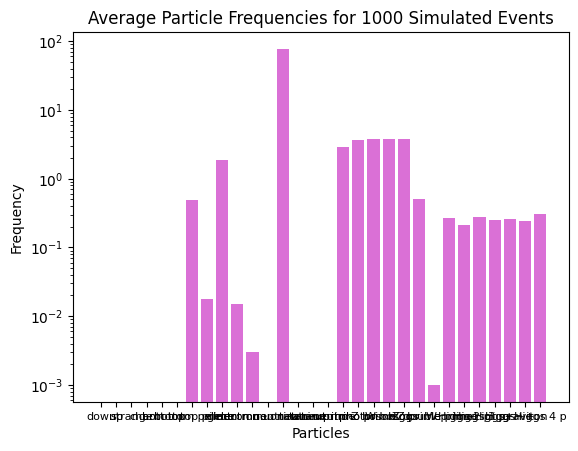

<Figure size 1500x600 with 0 Axes>

In [ ]:
species_number = len(species)
#Remove integers and insert an array of each ID's corresponding particle names as strings here
particles = ['down','up','strange','charm','bottom','top','bottom prime','top prime','gluon','electron','electron neutrino','muon','muon neutrino','tau','tau neutrino','tau prime','tau neutrino prime','gluon','photon','Z boson','W boson','Higgs','Z prime','Z double prime','W prime','Higgs 2 p','Higgs 3 p','Higgs+','Higgs++','graviton','Higgs 4 p']

freq = [averages[0], averages[1], averages[2], averages[3], averages[4], averages[5], averages[6], averages[7], averages[8], averages[9], averages[11], averages[12], averages[13], averages[14], averages[15], averages[16], averages[17], averages[18], averages[21], averages[22], averages[23], averages[24], averages[25], averages[32],averages[33],averages[34],averages[35],averages[36],averages[37],averages[38],averages[39]]

plt.bar(particles, freq, width = 0.8, color=['orchid'])
plt.xlabel("Particles")
plt.xticks(fontsize=8)
plt.ylabel("Frequency")
title1 = "Average Particle Frequencies for " + str(nevents) + " Simulated Events"
plt.title(title1)
plt.yscale('log')
plt.figure(figsize=(15,6))

plt.show()

Describe what you see. Why are there no final state quarks?

The quarks either form other particles or the program is not able to go far enough to simulate quarks.

## Slicing into Histograms

### $\color{orange}{\text{Activity 3: Slicing into Histograms}}$

Slicing a histogram means using indexing to select one spectrum from one axis of the histogram based on restrictions/filters imposed onto other, overlapping axes. For example, below is a spectra of momenta specifically for protons. Using this example, plot a sliced density plot for the pseudorapidities of protons. Then, create your own slice (ex. what are all the frequencies of particle species with pseudorapidities equal to 0, what is the momentum spectrum of electrons, etc). See `BoostHistogram`'s Quickstart or Indexing page for help (https://boost-histogram.readthedocs.io/en/latest/user-guide/quickstart.html).

Text(0.5, 1.0, 'Proton Momenta Density Spectrum for 1000 Events')

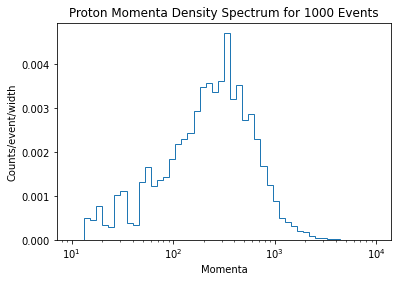

In [ ]:
momenta_proton = hist4D[sum, : , sum, bh.loc(2212)]
plt.stairs(momenta_proton.project(0).values() / n_events / hist4D.axes[1].widths, hist4D.axes[1].edges) #stairs expects bins
plt.semilogx()
plt.xlabel("Momenta")
plt.ylabel("Counts/event/width")
plt.title("Proton Momenta Density Spectrum for " + str(n_events) + " Events")

Text(0.5, 1.0, 'Proton Pseudorapidity Density Spectrum for 1000 Events')

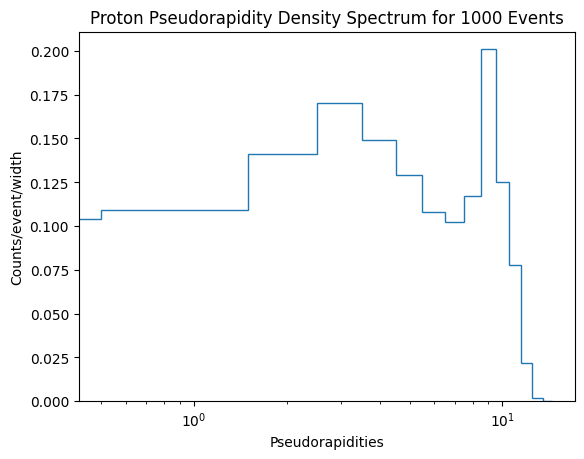

In [ ]:
pseudorapidities_proton = hist4D[sum, sum , : , bh.loc(2212)]
plt.stairs(pseudorapidities_proton.project(0).values() / n_events / hist4D.axes[2].widths, hist4D.axes[2].edges) #stairs expects bins
plt.semilogx()
plt.xlabel("Pseudorapidities")
plt.ylabel("Counts/event/width")
plt.title("Proton Pseudorapidity Density Spectrum for " + str(n_events) + " Events")

Text(0.5, 1.0, 'Electron Momenta Density Spectrum for 1000 Events')

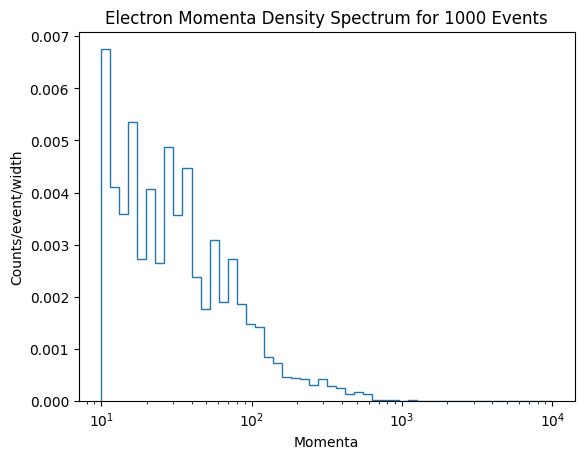

In [ ]:
momenta_electron = hist4D[sum, : , sum, bh.loc(11)]
plt.stairs(momenta_electron.project(0).values() / n_events / hist4D.axes[1].widths, hist4D.axes[1].edges) #stairs expects bins
plt.semilogx()
plt.xlabel("Momenta")
plt.ylabel("Counts/event/width")
plt.title("Electron Momenta Density Spectrum for " + str(n_events) + " Events")